## Lead Scoring with XGBoost

Una empresa educativa llamada X Education vende cursos en línea a profesionales del sector. Un día cualquiera, muchos profesionales interesados en los cursos entran en su sitio web y buscan cursos.

La empresa comercializa sus cursos en varios sitios web y motores de búsqueda como Google. Una vez que estas personas llegan al sitio web, pueden navegar por los cursos o rellenar un formulario para el curso o ver algunos vídeos. Cuando estas personas rellenan un formulario facilitando su dirección de correo electrónico o su número de teléfono, se les clasifica como clientes potenciales. Además, la empresa también consigue clientes potenciales a través de referencias anteriores. Una vez conseguidos estos clientes potenciales, los empleados del equipo de ventas empiezan a hacer llamadas, escribir correos electrónicos, etc. A través de este proceso, algunos de los clientes potenciales se convierten, mientras que la mayoría no. La tasa típica de conversión de clientes potenciales en X Education ronda el 30%.

Ahora bien, aunque X Education recibe muchos clientes potenciales, su tasa de conversión es muy baja. Por ejemplo, si adquieren 100 clientes potenciales en un día, sólo se convierten 30 de ellos. Para que este proceso sea más eficaz, la empresa desea identificar los clientes potenciales con mayor potencial, también conocidos como «clientes potenciales». Si identifican con éxito este conjunto de clientes potenciales, la tasa de conversión de clientes potenciales debería aumentar, ya que el equipo de ventas se centrará más en comunicarse con los clientes potenciales en lugar de llamar a todo el mundo.

En la fase inicial (arriba) se generan muchos clientes potenciales, pero sólo unos pocos se convierten en clientes de pago. En la fase intermedia, es necesario alimentar bien a los clientes potenciales (es decir, educar a los clientes potenciales sobre el producto, comunicarse constantemente, etc.) para obtener una mayor conversión de clientes potenciales.

X Education quiere seleccionar los clientes potenciales más prometedores, es decir, los que tienen más probabilidades de convertirse en clientes de pago. La empresa le pide que elabore un modelo en el que asigne una puntuación a cada uno de los clientes potenciales, de forma que los clientes con una puntuación más alta tengan más posibilidades de conversión y los clientes con una puntuación más baja tengan menos posibilidades de conversión. El director general, en particular, ha dado una cifra aproximada de la tasa de conversión de clientes potenciales objetivo en torno al 80%.

## Objetivo

Crear un modelo para asignar una puntuación entre 0 y 100 a cada uno de los clientes potenciales, que la empresa pueda utilizar para seleccionar clientes potenciales. Una puntuación más alta significaría que el cliente potencial es `hot`, es decir, que tiene más probabilidades de convertirse, mientras que una puntuación más baja significaría que el cliente potencial es `cold` y que en la mayoría de los casos no se convertirá.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib.pyplot import xticks
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
lead = pd.read_csv('Lead Scoring.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1. Pre procesamiento

### 1.1. Duplicate check

Verificar si existen filas duplicadas (no existen)

In [6]:
lead_dub = lead.copy()

# Checking for duplicates and dropping the entire duplicate row if any
lead_dub.drop_duplicates(subset=None, inplace=True)
lead_dub.shape

(9240, 37)

In [7]:
lead.shape

(9240, 37)

### 1.2. Data Inspection

In [8]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 1.3. Data Cleaning

Como podemos observar hay valores `Select` para muchas columnas. Esto se debe a que el cliente no selecciono ninguna opcion de la lista, por lo tanto muestra `Select`.
Los valores `Select` son tan buenos como `NULL`. Covertiremos los valores `Select` a valores `NaN`.

In [10]:
lead = lead.replace('Select', np.nan)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Cantidad de valores `NaN`

In [11]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Porcentaje de valores `NaN`

In [12]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Eliminaremos las columnas que tengan más de un 60% de valores `NaN`

In [13]:
lead = lead.drop(lead.loc[:,list(round(100*(lead.isnull().sum()/len(lead.index)), 2)>60)].columns, 1)

In [14]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Eliminación de las columnas `Lead Number` y `Prospect ID` ya que todos tienen valores únicos

In [15]:
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 1.4. Data Cleaning Column by column

#### 1.4.1. Lead Quality

Indica la calidad del `lead` basada en los datos y la intuición del empleado al que se ha asignado el `lead`.

In [16]:
lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [17]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

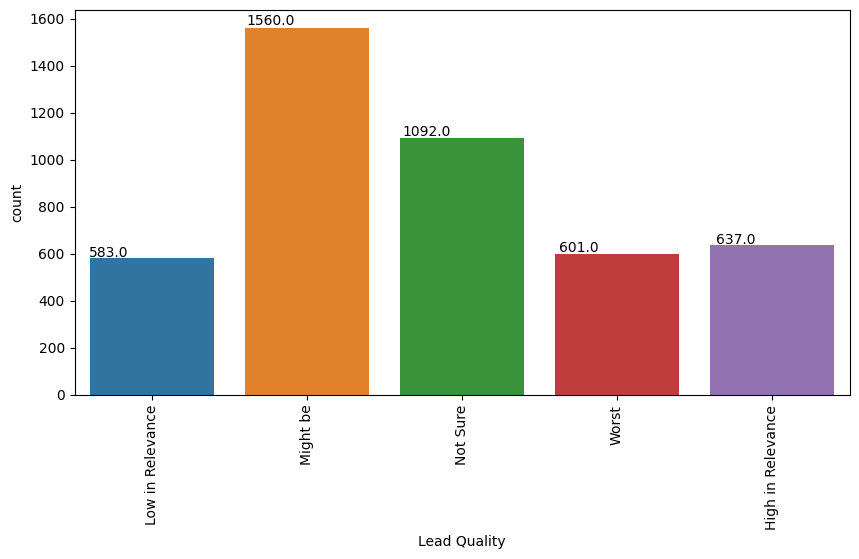

In [26]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = lead['Lead Quality'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

Como el `Lead Quality` se basa la intuición del empleado, si se deja algo en blanco podemos convertir los `Nan` en valores `Not sure`

In [27]:
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')

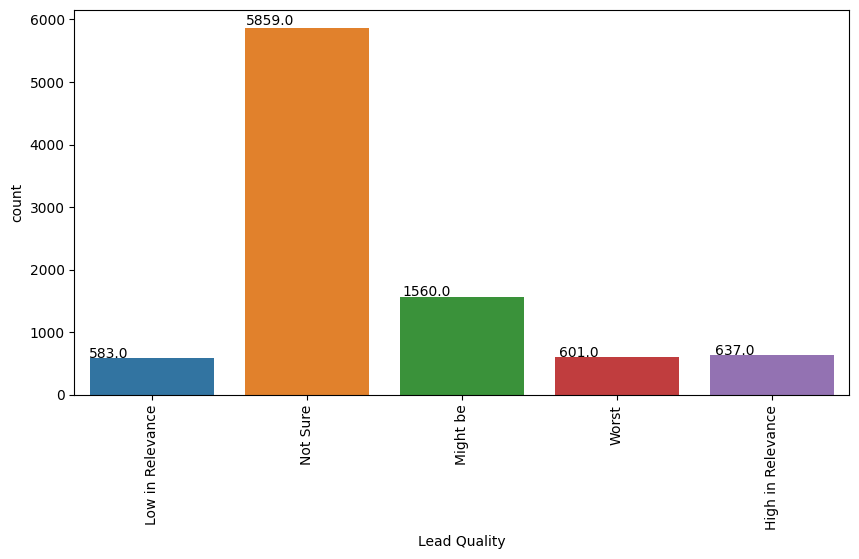

In [28]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['Lead Quality'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

#### 1.4.2. Asymmetrique (Activity, Profile) (Index, Score)

Son pocos los campos en los que la psicología humana, el comportamiento del consumidor y la comprensión de los negocios superan a la interpretación estadística de los datos.

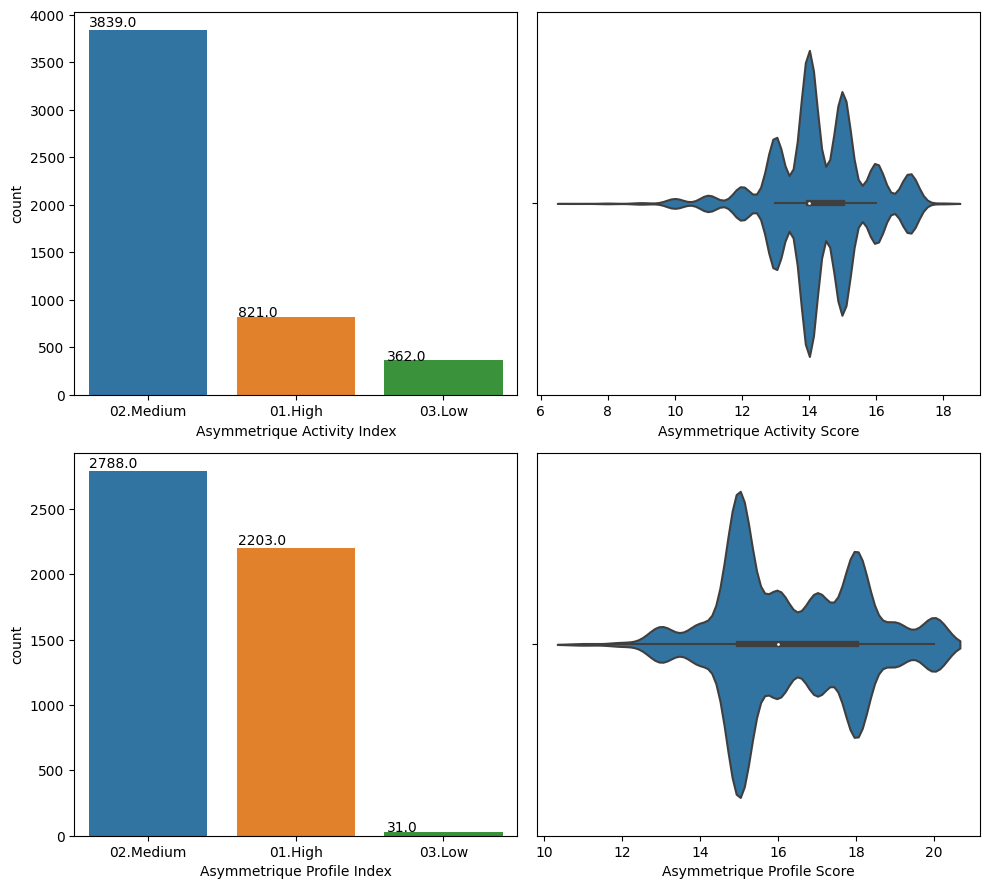

In [30]:
fig, axs = plt.subplots(2,2, figsize = (10,9))
plt1 = sns.countplot(x = lead['Asymmetrique Activity Index'], ax = axs[0,0])
for p in plt1.patches:
    plt1.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt2 = sns.violinplot(x = lead['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(x = lead['Asymmetrique Profile Index'], ax = axs[1,0])
for p in plt3.patches:
    plt3.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt4 = sns.violinplot(x = lead['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

Hay demasiada variación en estos parámetros por lo que no es fiable imputar ningún valor en ellos. Además, estas variables tienen más del 45% de valores nulos, con lo cual podemos eliminarlas.

In [31]:
lead = lead.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score',
                  'Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [32]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### 1.4.3. City

In [33]:
lead.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [34]:
lead.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

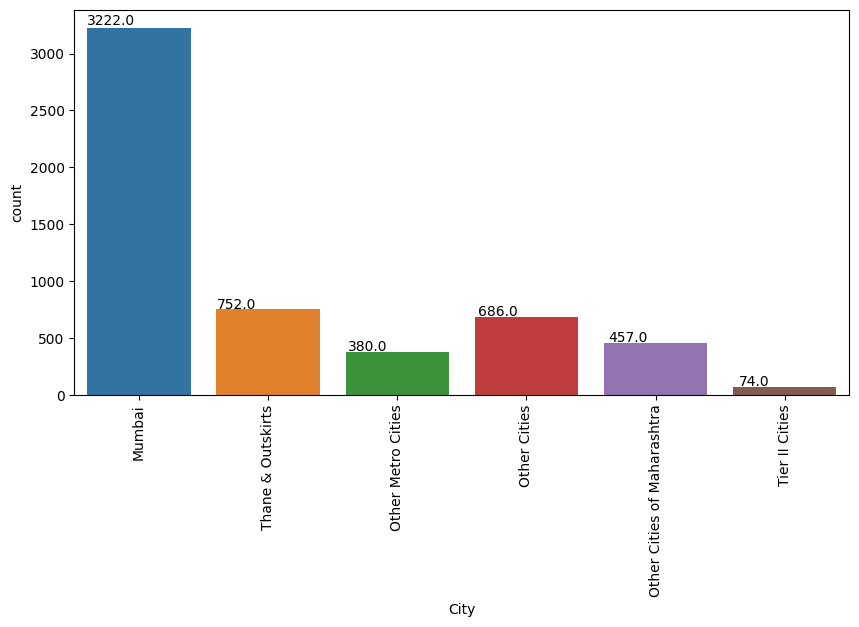

In [36]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['City'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

Alrededor del 57,8% de los datos disponibles son de `Mumbai`, por lo que podemos imputar Mumbai en los valores que faltan.

In [37]:
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

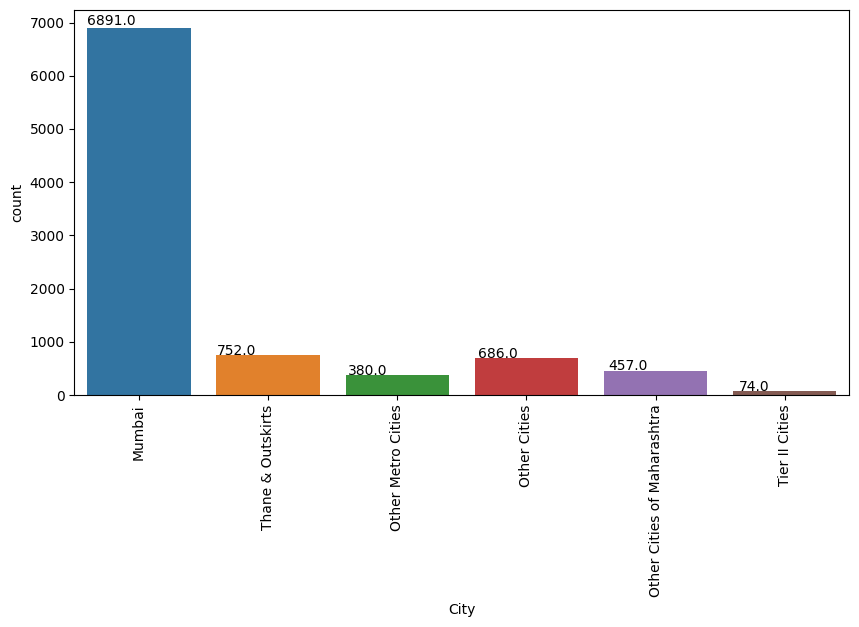

In [40]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x=lead['City'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

#### 1.4.4. Specialization

In [41]:
lead.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [42]:
lead.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

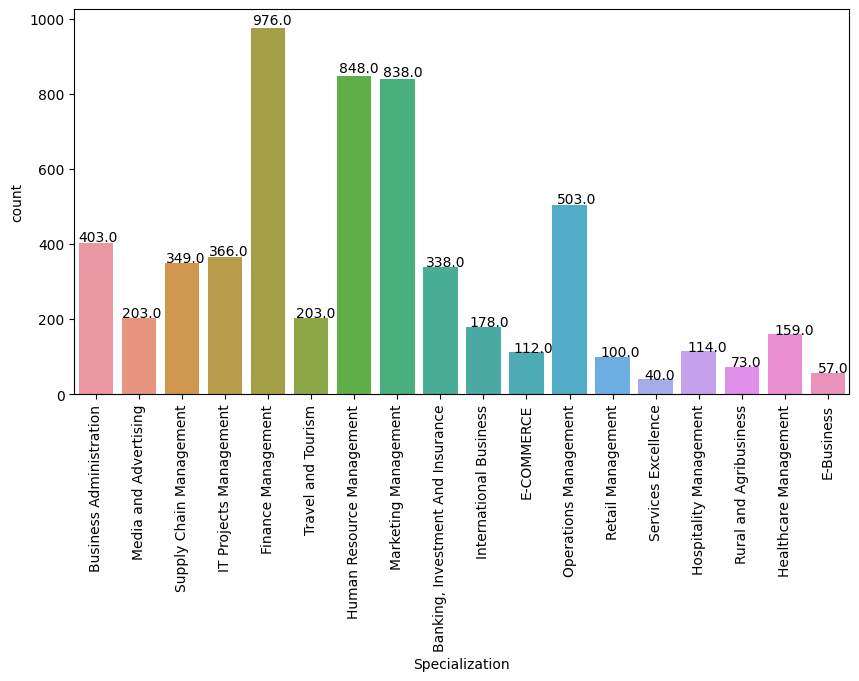

In [43]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['Specialization'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

Puede darse el caso de que el cliente no haya introducido ninguna especialización si su opción no está disponible en la lista, que no tenga ninguna especialización o que sea estudiante. Por lo tanto, podemos crear una categoría «Otros» para los valores omitidos. 

In [44]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

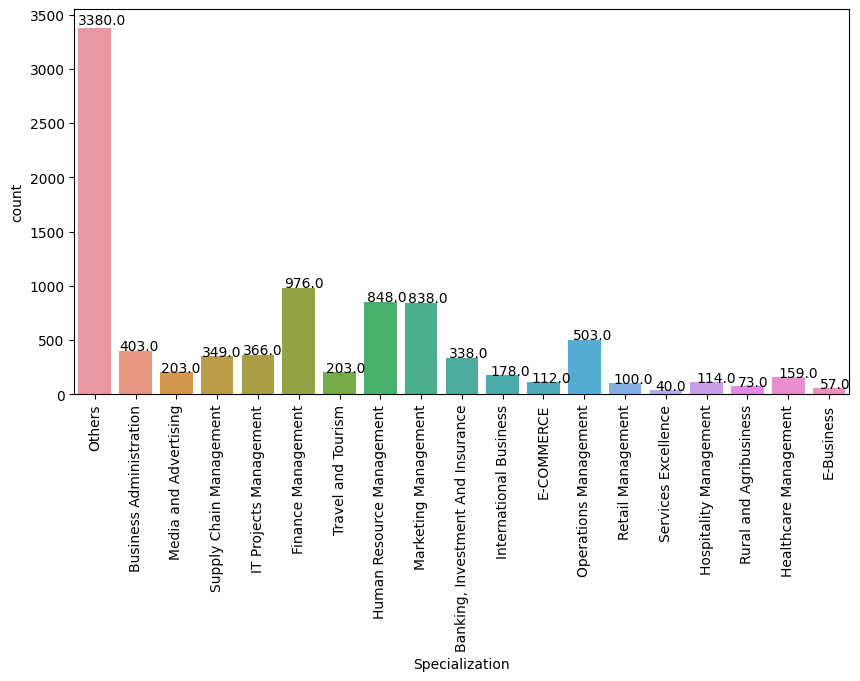

In [45]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['Specialization'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

In [46]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### 1.4.5. Tags

In [47]:
lead.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [48]:
lead.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

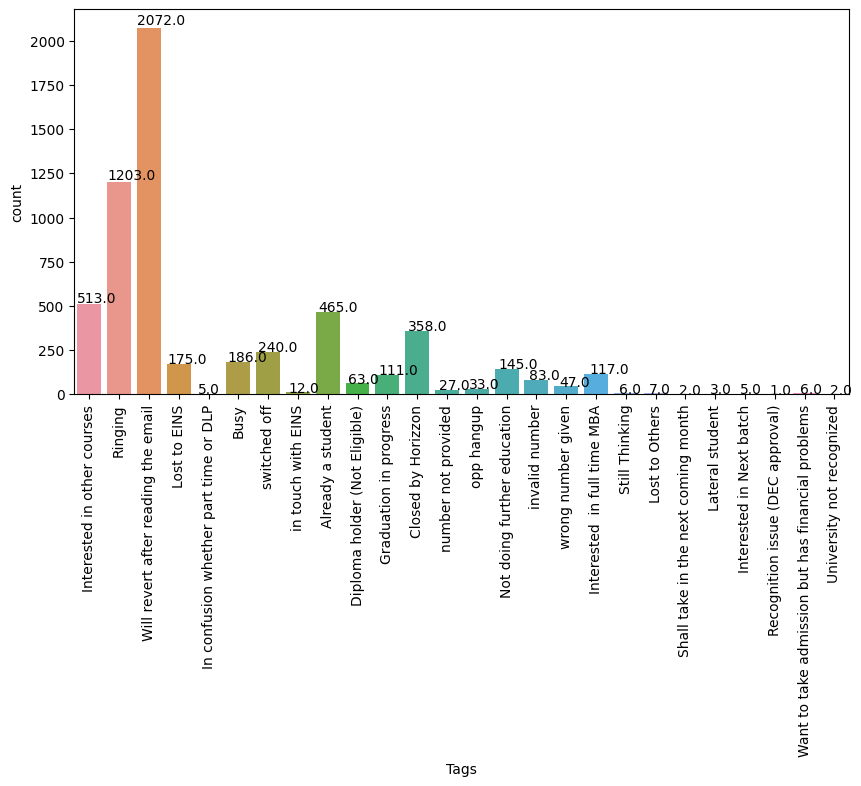

In [49]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['Tags'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

Los `NaN` pueden ser imputados por `Will revert after reading the email`

In [50]:
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

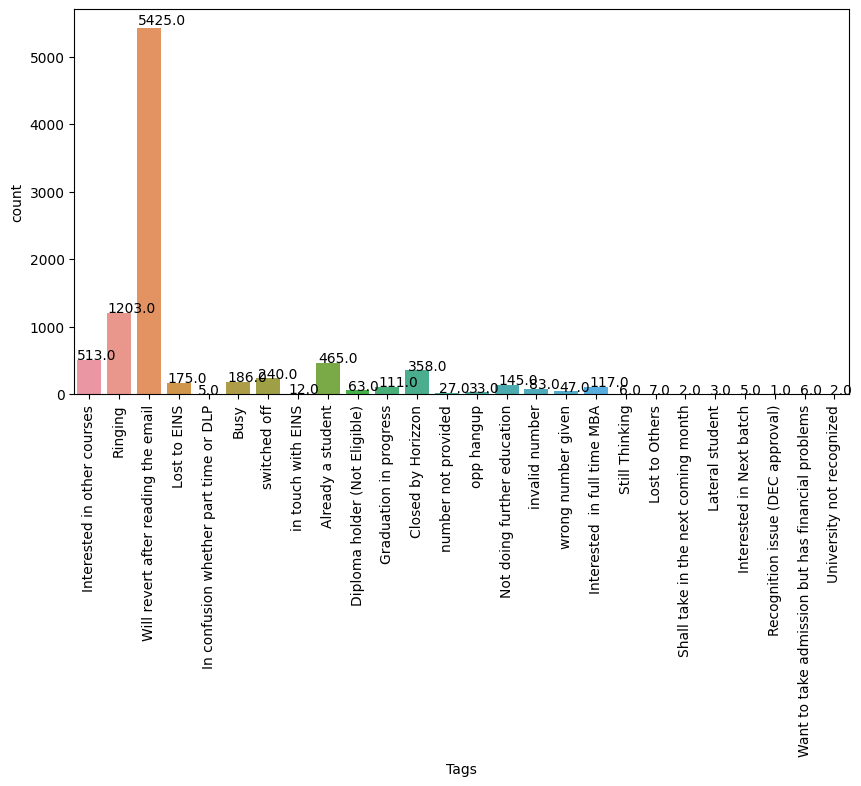

In [51]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['Tags'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

#### 1.4.6. What matters most to you in choosing a course

In [52]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [53]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

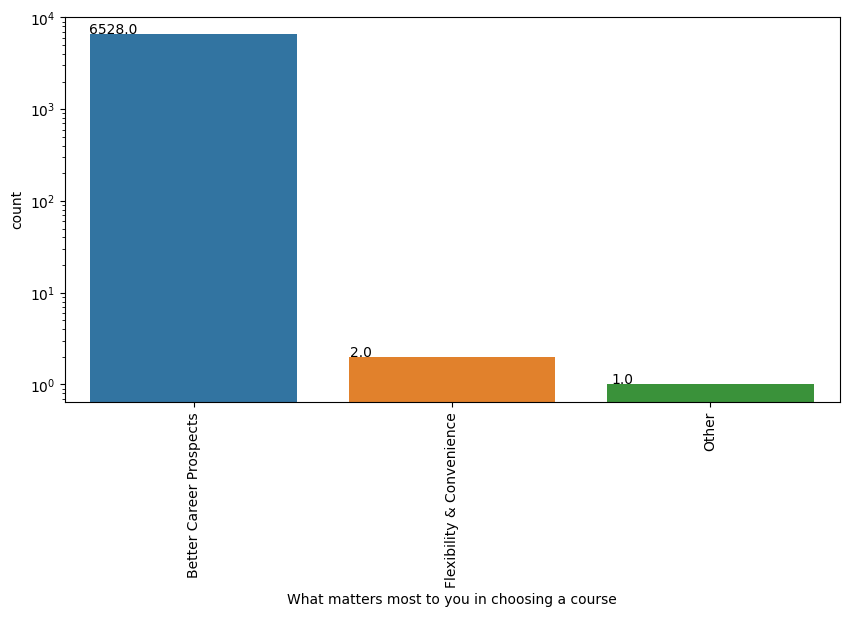

In [54]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['What matters most to you in choosing a course'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Los `NaN` puede imputarse como `Better Career Prospects`

In [55]:
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

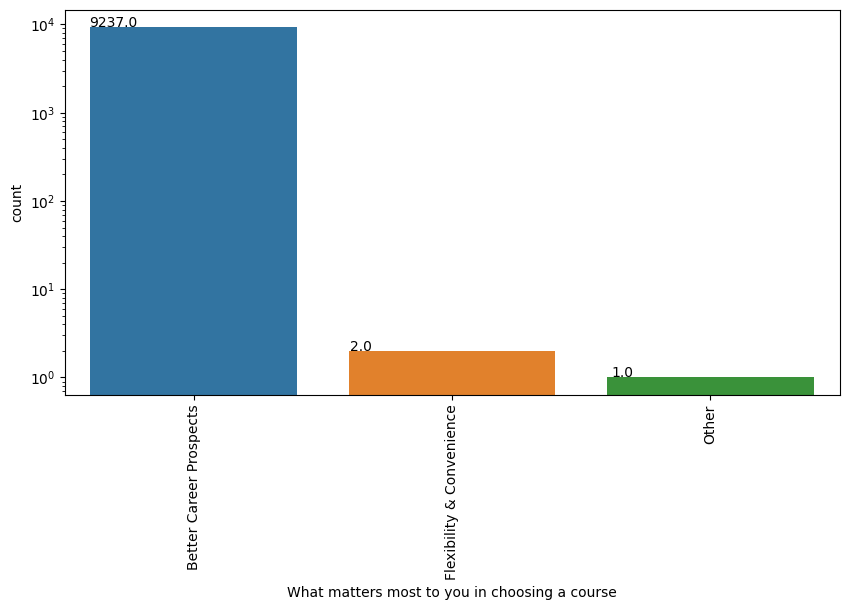

In [56]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['What matters most to you in choosing a course'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

#### 1.4.7. Occupation

In [57]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [58]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

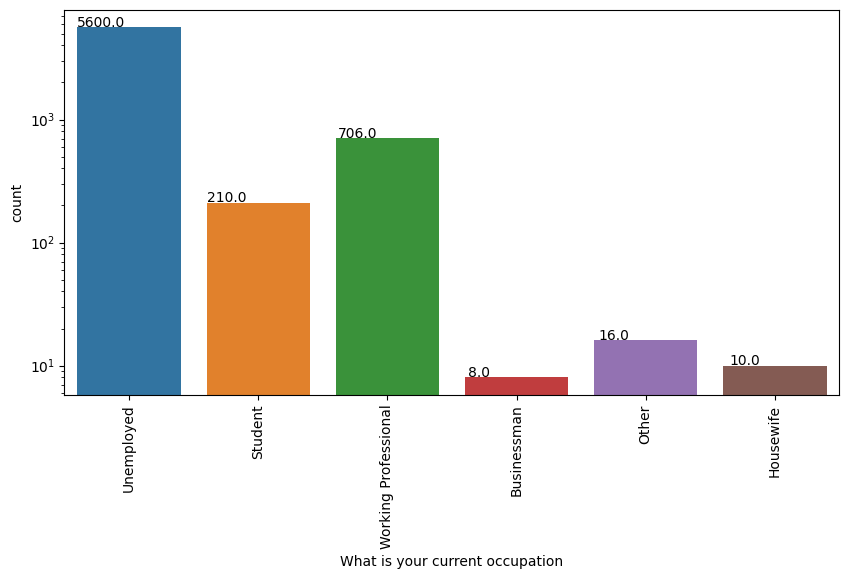

In [59]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['What is your current occupation'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

86% de las observaciones son `Unemployed` por lo que los `NaN` pueden imputarse como `Unemployed`

In [60]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

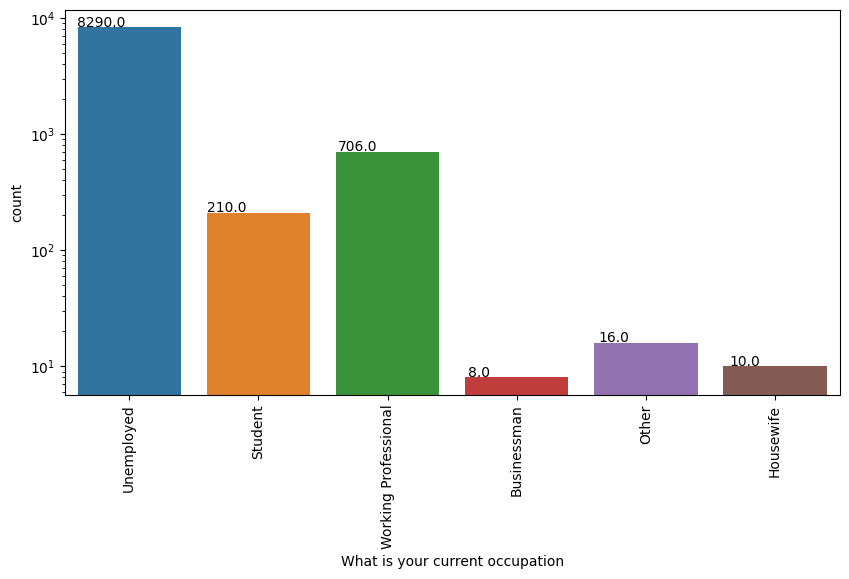

In [61]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['What is your current occupation'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

#### 1.4.8. Country

In [62]:
lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [63]:
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

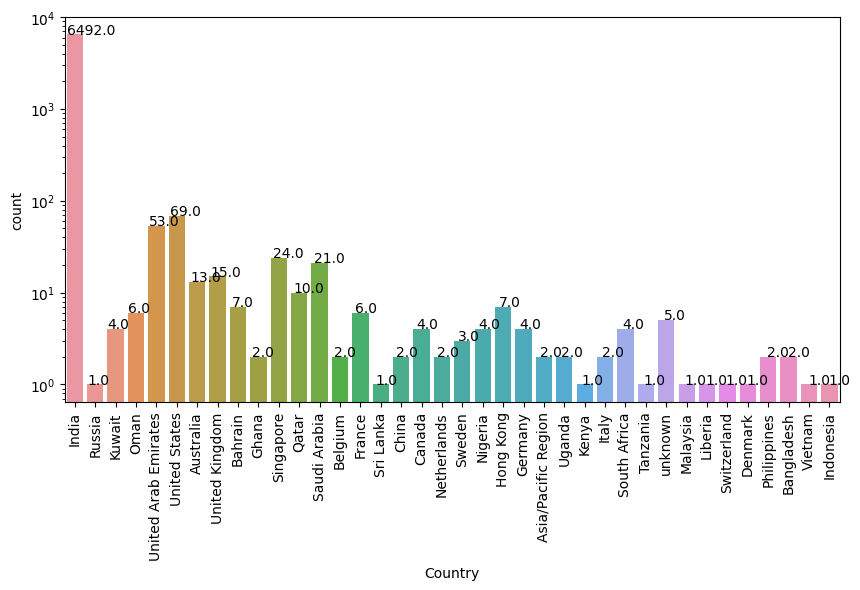

In [64]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['Country'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

Los `NaN`se pueden imputar como `India`

In [65]:
lead['Country'] = lead['Country'].replace(np.nan, 'India')

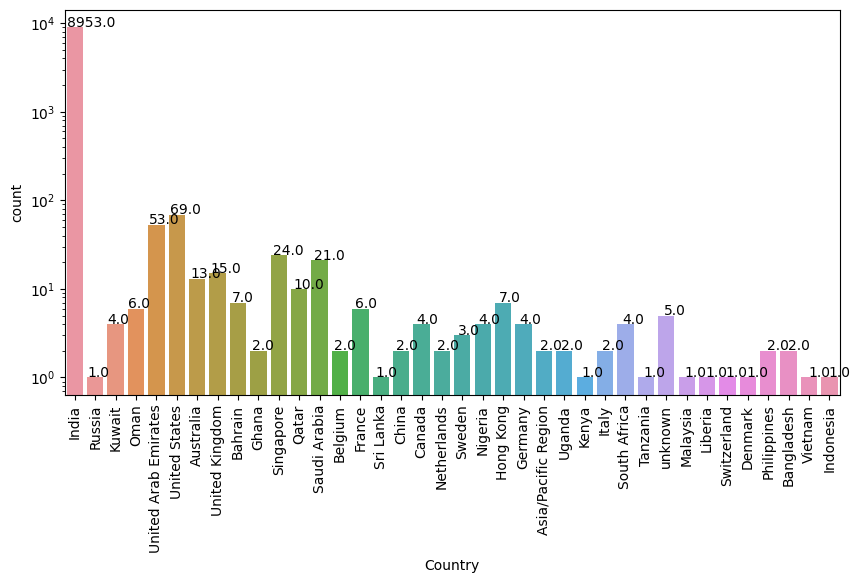

In [66]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = lead['Country'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [67]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

El resto de valores perdidos son inferiores al 1,5%, por lo que podemos eliminar estas filas.

In [68]:
lead.dropna(inplace = True)
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### 1.5. Exploratory Analysis

#### 1.5.1. asdasda